In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('updated_NSCH_Vision_Health_Data.csv')

# Display the first few rows of the dataset
print(df.head())

   YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0       2016     2017           US     National       NSCH   
1       2016     2017           US     National       NSCH   
2       2016     2017           OH         Ohio       NSCH   
3       2016     2017           TN    Tennessee       NSCH   
4       2016     2017           UT         Utah       NSCH   

                 Topic       Category  \
0  Service Utilization           Need   
1  Service Utilization           Need   
2  Service Utilization      Screening   
3  Service Utilization  Provider Type   
4  Service Utilization           Need   

                                            Question  \
0  Percentage of children who needed vision care ...   
1  Percentage of children who needed vision care ...   
2  Percentage of children who have ever had their...   
3  Percentage of children who have ever had their...   
4  Percentage of children who needed vision care ...   

                       Response         Age

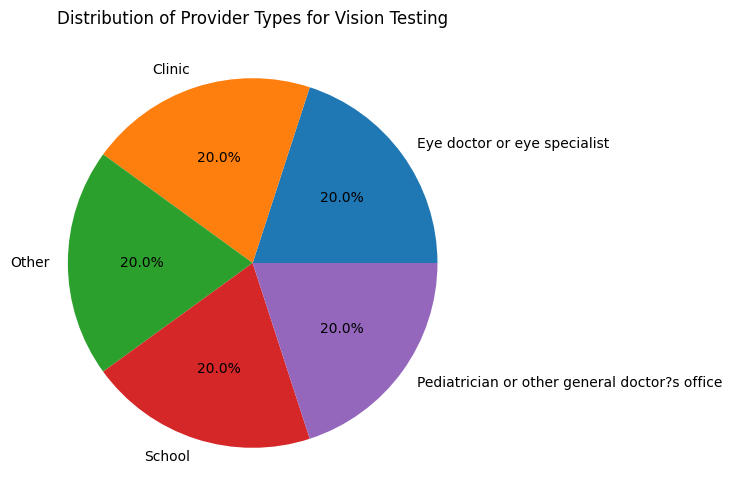

In [5]:
# Analyze provider types for vision testing
provider_types = df[df['Category'] == 'Provider Type']['Response'].value_counts()
plt.figure(figsize=(10, 6))
provider_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Provider Types for Vision Testing')
plt.ylabel('')
plt.show()

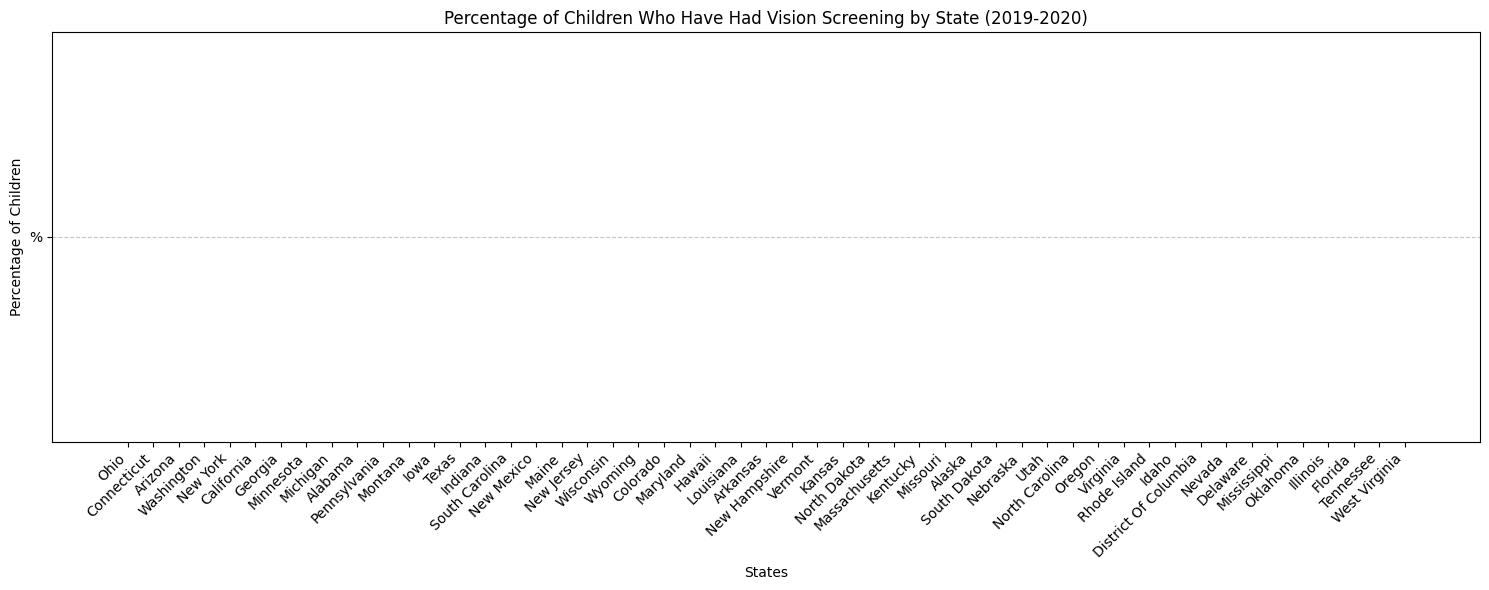

In [31]:
# Filter data for vision screening
screening_data = df[(df['Topic'] == 'Service Utilization') & 
                    (df['Category'] == 'Screening') & 
                    (df['Response'] == 'Yes') &
                    (df['LocationDesc'] != 'National')].sort_values('Data_Value_Unit', ascending=False) 

# Create the bar chart
plt.figure(figsize=(15, 6))
plt.bar(screening_data['LocationDesc'], screening_data['Data_Value_Unit'])
plt.title('Percentage of Children Who Have Had Vision Screening by State (2019-2020)')
plt.xlabel('States')
plt.ylabel('Percentage of Children')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()